### SVM MODEL 

Implementation of the model used in class (Day 18)

In [19]:
# imports 
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
import time
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature



In [2]:
# also bring in the data from the image_processing script 
from image_processing import label_img, load_training_data, get_vectors, get_labels

In [3]:
feature_vectors, class_labels = get_vectors()
labels = get_labels()

categories = labels.keys()
n_samples = 905
n_features = 905
N = 507
h = 64
w = 64
n_classes = len(categories)

train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels, random_state=1, test_size=0.25)
print(len(train_vectors))
print(len(test_vectors))


678
227


In [13]:
DIR = '/Users/elizabethgibbons/Desktop/shrooms/ML_classification_of_Mushrooms/Resized_shrooms'


In [5]:
filename = '/Users/elizabethgibbons/Desktop/shrooms/ML_classification_of_Mushrooms/SVM_out'
rerun_training = True
tmp_vectors = train_vectors
tmp_labels = train_labels



In [8]:
start = time.time()
if rerun_training:
    print("Fitting the classifier to the training set")
    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    clf = clf.fit(tmp_vectors, tmp_labels)
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)
    # save the model to a file
    pickle.dump(clf, open(filename, 'wb'))

else:
   # read the model from a file
    print("reading pickle file.")
    clf = pickle.load(open(filename, 'rb'))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

end = time.time()
print("Runtime",end - start)


Fitting the classifier to the training set


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Runtime 4876.12818312645


Some quick metrics to see how it did....

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.93      1.00      0.97       212

   micro avg       0.93      0.93      0.93       227
   macro avg       0.47      0.50      0.48       227
weighted avg       0.87      0.93      0.90       227

Average precision-recall score: 1.00


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

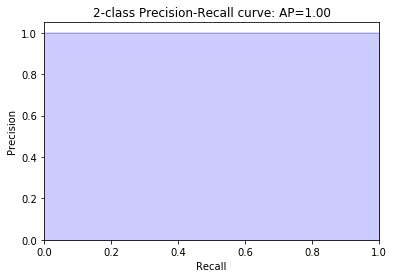

In [33]:
# Quantitative evaluation of the model quality on the test set

#make some temporary variablse so you can change this easily
predict_vectors = test_vectors

true_labels = test_labels

pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))

# this is me being lazy and not changing variable names from my examples
y_test = list(map(int, pred_labels))
y_score = list(map(int, true_labels))


precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))




### THOUGHTS on this....


Our model did really bad. Everything was perfectly predicted, which indicates there was likely something wrong with our data. My guess would be that we had far too many 1 IDs (poisonous mushrooms) in our dataset, particularly because we decided for the purposes of this classifier, it would be better to take a 'guilty until proven innocent' approach. That is... if you don't know that a mushroom is edible (or we couldn't find an ID saying it was) assume it is poisonous and live! Something that would likely improve this model would be to balance out the number of poisonous and nonpoisonous mushrooms which are being predicted in the model. That way, the model would not be making predictions based on there simply being more poisonous (more probable occurance) than nonpoisonous.